# Decision trees

In [1]:
# Python setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


## Hand written digits

Classification of hand written digits.

### Data

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


The data in digits.images is a 1797x8x8 array, with each pixel value within an 8x8 grid:

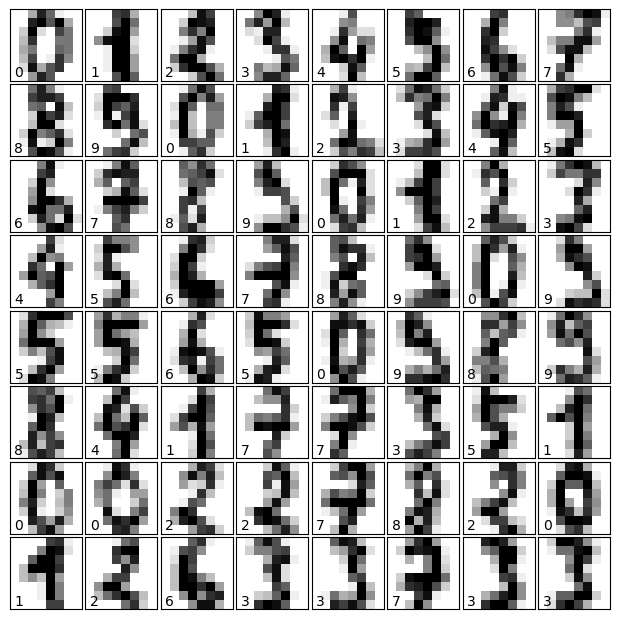

In [4]:
# HIDE CODE
# Set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_depth=11)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Model accuracy: {metrics.accuracy_score(y_pred, y_test):.2f}")

Model accuracy: 0.85


### Classification report

Let's plot the confusion matrix, where each row represents the true label of the sample, while each column represents the predicted label. 

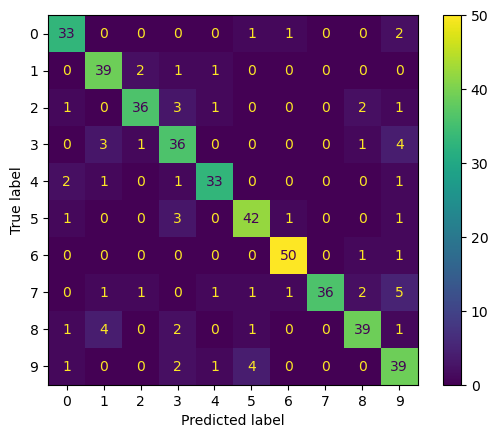

In [6]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

Finally, we take a look at the classification report.

In [7]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.846     0.892     0.868        37
           1      0.812     0.907     0.857        43
           2      0.900     0.818     0.857        44
           3      0.750     0.800     0.774        45
           4      0.892     0.868     0.880        38
           5      0.857     0.875     0.866        48
           6      0.943     0.962     0.952        52
           7      1.000     0.750     0.857        48
           8      0.867     0.812     0.839        48
           9      0.709     0.830     0.765        47

    accuracy                          0.851       450
   macro avg      0.858     0.851     0.852       450
weighted avg      0.859     0.851     0.852       450

